


<h2 align=center style="line-height:500%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Problem 2: Hierarchical clustering</font>
</h2>


<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Part 1
</font>
</h2>


<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تنها با در نظر گرفتن دو ویژگی‌ <code>market cap</code> و <code>volume</code>، الگوریتم خوشه‌بندی سلسله‌مراتبی را اجرا کرده و دندوگرام (Dendrogram) به‌دست‌آمده را نمایش دهید. با توجه به نتیجه‌ی حاصل‌شده، چنان‌چه بخواهیم این ۲۰ رمزارز را به ۲ خوشه‌ی مجزا تقسیم کنیم، این دو خوشه را مشخص کنید و سعی کنید برای نتایج حاصل را تحلیل و تفسیر کنید.
</font>
</p>


Prepping the data:

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

coin_data = pd.read_excel(r'D:\Sharif University of Tech\Data Sience Boot Camp\Project\Second Phaze\Part_2\coins_data.xlsx')

features = coin_data[['MarketCap', 'Volume']]

Performing hierarchical clustering and the dendogram:

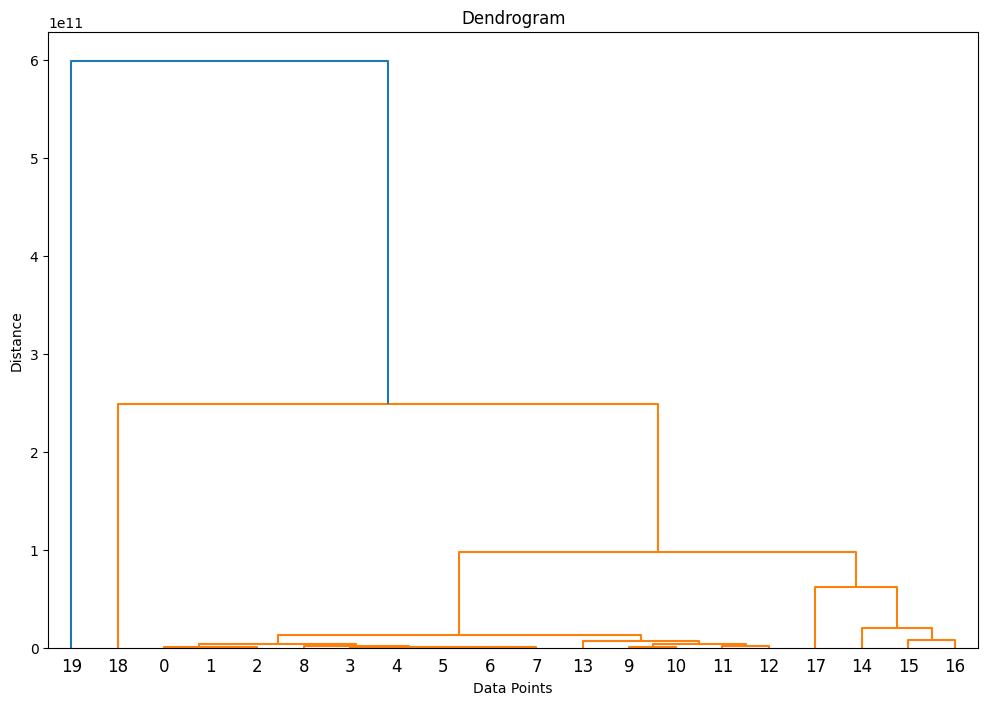

In [43]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(features, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z, orientation='top')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.show()

Assuming the number of clusters is 2:

In [44]:
n_clusters = 2
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
coin_data['Cluster'] = hc.fit_predict(features)

In [45]:
cluster_0 = coin_data[coin_data['Cluster'] == 0]
cluster_1 = coin_data[coin_data['Cluster'] == 1]

print("Cryptocurrencies in Cluster 0:")
print(cluster_0)

print("\nCryptocurrencies in Cluster 1:")
print(cluster_1)

Cryptocurrencies in Cluster 0:
   Symbol        Volume     MarketCap      TotalSupply   ProofType  \
0     LEO  1.823284e+06  3.586504e+09        985239504         PoS   
1     UNI  9.918768e+07  3.992451e+09       1000000000         PoS   
2    WBTC  1.415410e+08  4.237575e+09           163106         PoW   
3    AVAX  2.197065e+08  4.901630e+09        431804080         PoS   
4     DAI  2.177113e+08  5.513661e+09       5347888596  stablecoin   
5    SHIB  2.479944e+08  5.606251e+09  589589040239380         PoS   
6     LTC  5.913019e+08  5.729295e+09         84000000         PoW   
7     TRX  2.719028e+08  6.018922e+09      88996805683         PoS   
8     DOT  2.035592e+08  6.659550e+09       1364182225         PoW   
9   MATIC  4.232990e+08  8.053185e+09      10000000000         PoS   
10    SOL  6.338963e+08  8.349993e+09        559509636         PoH   
11   DOGE  6.311493e+08  1.034239e+10     141339436384         PoW   
12    ADA  3.647996e+08  1.210914e+10      36244287753     

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 0 (Cryptocurrencies with Lower Market Cap and Volume):
</font>
</h2>

This cluster contains the majority of the cryptocurrencies, including LEO, UNI, WBTC, AVAX, and others.

These cryptocurrencies generally have lower market capitalization and trading volume compared to those in Cluster 1.
Proof types in this cluster vary between PoS, PoW, stablecoin, PoH, and RPCA, indicating diversity in the types of cryptocurrencies.

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 1 (Cryptocurrency with High Market Cap and Volume):
</font>
</h2>

This cluster contains a single cryptocurrency, which is Bitcoin (BTC).

Bitcoin stands out as the cryptocurrency with the highest market capitalization and trading volume among the 20 cryptocurrencies.

The model has grouped cryptocurrencies based on their market cap and volume. 

As expected it has separated Bitcoin, which is notably different from the rest of the cryptocurrencies due to its much higher market capitalization and trading volume.

If we were to need more meaningfull clusters or different groupings, we could experiment with different clustering techniques, features, or adjust the number of clusters based on our specific goal.

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Part 2
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
اکنون ویژگی <code>ProofType</code> را به دو ویژگی قبلی اضافه کرده و این‌بار ارزها را با سه ویژگی خوشه‌بندی کنید. تقسیم‌بندی رمز‌ارزها به ۲ خوشه مطابق این خوشه‌بندی به چه صورت خواهد بود؟ نتیجه را با حالت قبل مقایسه کرده و تفسیر کنید.
</font>
</p>


Making the changes, encoding the ProofType column and modeling:

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
coin_data['ProofType_Label'] = label_encoder.fit_transform(coin_data['ProofType'])

features = coin_data[['MarketCap', 'Volume', 'ProofType_Label']]

n_clusters = 3
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
coin_data['Cluster'] = hc.fit_predict(features)

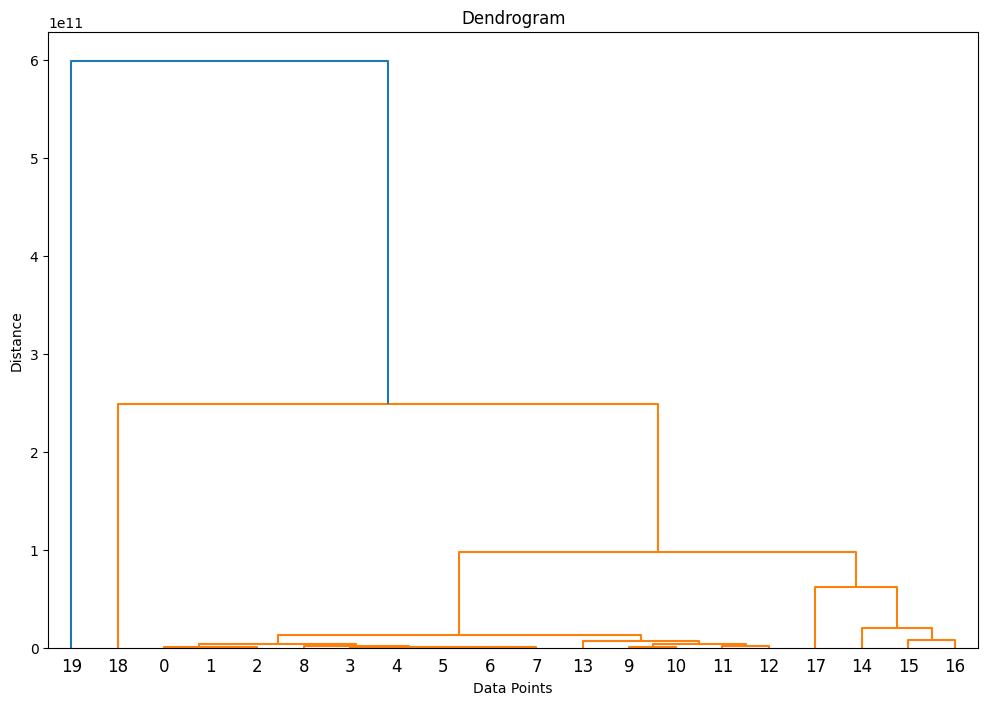

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(features, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z, orientation='top')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.show()

In [48]:
cluster_0 = coin_data[coin_data['Cluster'] == 0]
cluster_1 = coin_data[coin_data['Cluster'] == 1]
cluster_2 = coin_data[coin_data['Cluster'] == 2]

print("Cryptocurrencies in Cluster 0:")
print(cluster_0)

print("\nCryptocurrencies in Cluster 1:")
print(cluster_1)

print("\nCryptocurrencies in Cluster 2:")
print(cluster_2)


Cryptocurrencies in Cluster 0:
   Symbol        Volume     MarketCap      TotalSupply   ProofType  \
0     LEO  1.823284e+06  3.586504e+09        985239504         PoS   
1     UNI  9.918768e+07  3.992451e+09       1000000000         PoS   
2    WBTC  1.415410e+08  4.237575e+09           163106         PoW   
3    AVAX  2.197065e+08  4.901630e+09        431804080         PoS   
4     DAI  2.177113e+08  5.513661e+09       5347888596  stablecoin   
5    SHIB  2.479944e+08  5.606251e+09  589589040239380         PoS   
6     LTC  5.913019e+08  5.729295e+09         84000000         PoW   
7     TRX  2.719028e+08  6.018922e+09      88996805683         PoS   
8     DOT  2.035592e+08  6.659550e+09       1364182225         PoW   
9   MATIC  4.232990e+08  8.053185e+09      10000000000         PoS   
10    SOL  6.338963e+08  8.349993e+09        559509636         PoH   
11   DOGE  6.311493e+08  1.034239e+10     141339436384         PoW   
12    ADA  3.647996e+08  1.210914e+10      36244287753     

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 0:
</font>
</h2>


Contains the majority of cryptocurrencies (Symbol 0 to 17).
It includes cryptocurrencies with various ProofTypes such as PoS, PoW, stablecoin, and RPCA.
Market capitalizations and trading volumes in this cluster vary widely.
The inclusion of different ProofTypes results in a diverse cluster.

This cluster contains the majority of the cryptocurrencies, including LEO, UNI, WBTC, AVAX, and many others.

These cryptocurrencies generally have lower market capitalization and trading volume compared to those in Cluster 1.
Proof types in this cluster vary between PoS, PoW, stablecoin, PoH, and RPCA, indicating diversity in the types of cryptocurrencies.

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 1:
</font>
</h2>

Contains a single cryptocurrency, which is Ethereum (ETH).
Ethereum stands out as the only cryptocurrency in this cluster.
Ethereum has a relatively high market capitalization and trading volume.

This cluster contains the majority of the cryptocurrencies, including LEO, UNI, WBTC, AVAX, and many others.

These cryptocurrencies generally have lower market capitalization and trading volume compared to those in Cluster 1.
Proof types in this cluster vary between PoS, PoW, stablecoin, PoH, and RPCA, indicating diversity in the types of cryptocurrencies.

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Cluster 2:
</font>
</h2>

Contains a single cryptocurrency, which is Bitcoin (BTC).
Bitcoin is the only cryptocurrency in this cluster.
Bitcoin stands out with the highest market capitalization and trading volume among the 20 cryptocurrencies.

<h2 align=left style="line-height:150%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
So what conclusions can we draw from these results ?
</font>
</h2>



The choice between two or three clusters depends on the level of depth we want to conduct in our analysis. 

With three clusters, we can further differentiate cryptocurrencies based on their ProofType, resulting in a more detailed grouping. However, if we were to prefer a more generalized view, two clusters based on market capitalization and trading volume might be more sufficient.

Ultimately, the choice of clustering method and the number of clusters should align with your specific goals and what insights you aim to gain from the data. Different clustering methods and configurations can provide varying levels of detail and may reveal different patterns in the data.

<h2 align=left style="line-height:200%;font-family:vazir;color:#0099cc">
<font  color="#0099cc">
Part 3
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: justify;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در انتها یک یا چند ویژگی که فکر می‌کنید منجر به یک خوشه‌بندی بامعنا و تفسیرپذیرتر خواهد شد را نیز در نظر گرفته و آزمایش را مجدد تکرار کنید. در این بخش می‌توانید هر نوع ویژگی مرتبطی که قابل استدلال باشد را اضافه کنید (مثل ستون <code>Network</code> در مجموعه‌داده‌ی فعلی).
</font>
</p>



Adding the Network to features and encoding it:

In [49]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
coin_data['Network_Label'] = label_encoder.fit_transform(coin_data['Network'])


features = coin_data[['MarketCap', 'Volume', 'ProofType_Label', 'Network_Label']]

Ploting the dendogram:

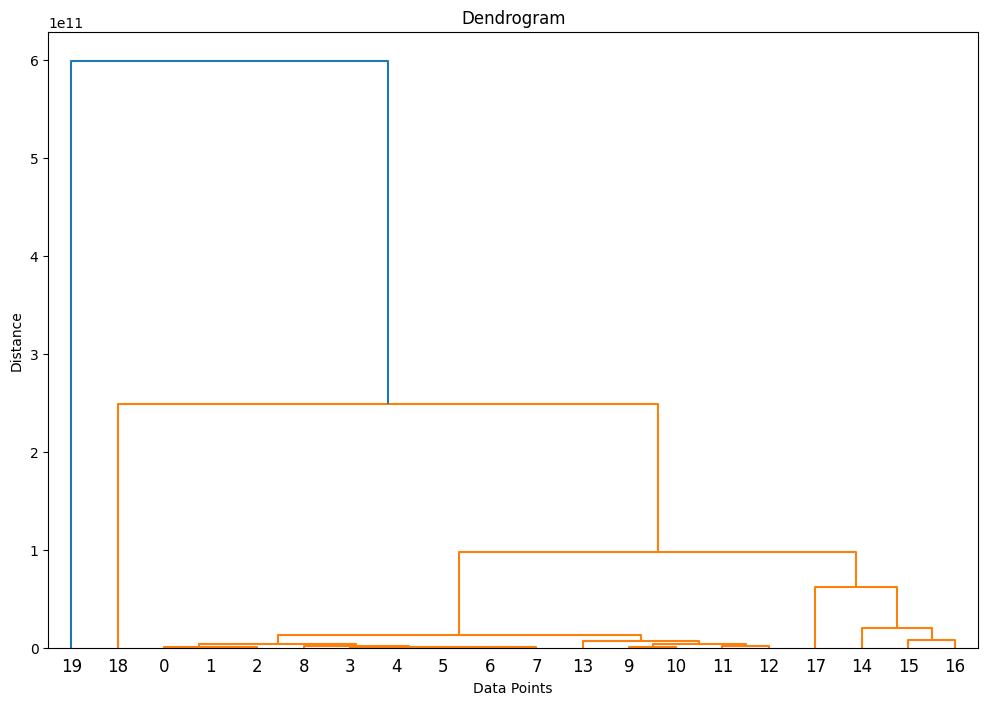

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

Z = linkage(features, method='ward')
plt.figure(figsize=(12, 8))
dendrogram(Z, orientation='top')
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Distance')

plt.show()

As we can see, the vertical distance is greaterin the blue line indicating that the desired number of clusters is 2

In [51]:
n_clusters = 2
hc = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
coin_data['Cluster'] = hc.fit_predict(features)

cluster_0 = coin_data[coin_data['Cluster'] == 0]
cluster_1 = coin_data[coin_data['Cluster'] == 1]

print("Cryptocurrencies in Cluster 0:")
print(cluster_0)

print("\nCryptocurrencies in Cluster 1:")
print(cluster_1)

Cryptocurrencies in Cluster 0:
   Symbol        Volume     MarketCap      TotalSupply   ProofType  \
0     LEO  1.823284e+06  3.586504e+09        985239504         PoS   
1     UNI  9.918768e+07  3.992451e+09       1000000000         PoS   
2    WBTC  1.415410e+08  4.237575e+09           163106         PoW   
3    AVAX  2.197065e+08  4.901630e+09        431804080         PoS   
4     DAI  2.177113e+08  5.513661e+09       5347888596  stablecoin   
5    SHIB  2.479944e+08  5.606251e+09  589589040239380         PoS   
6     LTC  5.913019e+08  5.729295e+09         84000000         PoW   
7     TRX  2.719028e+08  6.018922e+09      88996805683         PoS   
8     DOT  2.035592e+08  6.659550e+09       1364182225         PoW   
9   MATIC  4.232990e+08  8.053185e+09      10000000000         PoS   
10    SOL  6.338963e+08  8.349993e+09        559509636         PoH   
11   DOGE  6.311493e+08  1.034239e+10     141339436384         PoW   
12    ADA  3.647996e+08  1.210914e+10      36244287753     

As we can see, adding the "Network" feature helped in creating more interpretable and meaningful clusters. 

When we initially clustered the data using only the "MarketCap," "Volume," and "ProofType_Label" features, the clusters did not show distinct patterns. However, after adding the "Network" feature and performing clustering with it, the clusters became more interpretable. 

This suggests that the "Network" feature provided valuable information for distinguishing between cryptocurrencies.